In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
###Each batch contain 32 images
##Epoch is no. of time we ar going to train the model

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=65

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:/Final_year_project/Final_year_project/models/Sugarcane Leaf Disease Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)    

Found 2521 files belonging to 5 classes.


In [11]:
class_names = dataset.class_names
class_names

['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']

In [6]:
len(dataset)

79

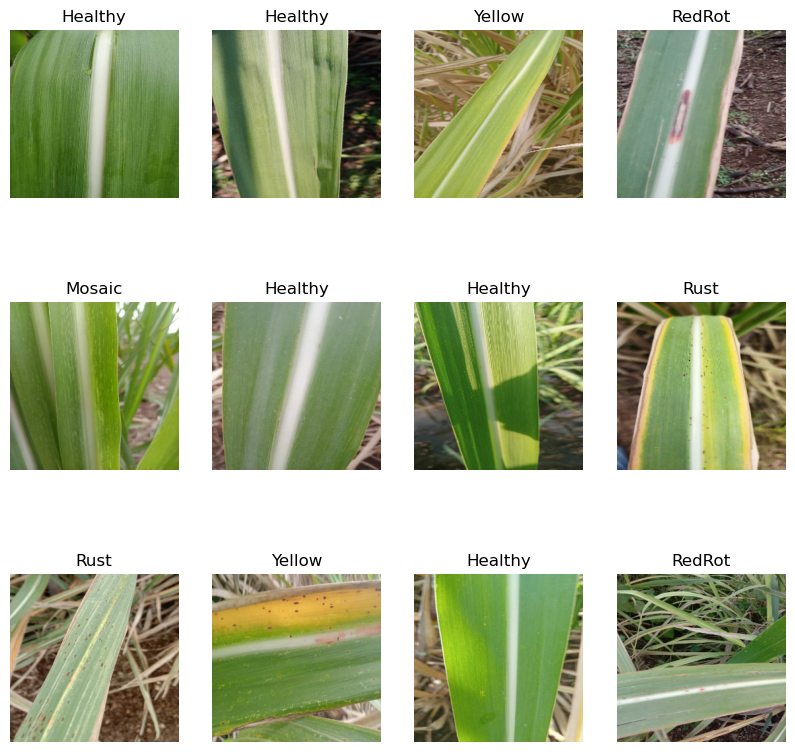

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for image_batch, label_batch in dataset.take(1):
        for i in range(12):
            ax = plt.subplot(3,4,i+1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(class_names[label_batch[i]])
            plt.axis("off")

In [8]:
len(dataset)

79

In [10]:
# 80% ==> training
# 205==> 10% ==>validation, 10% ==>test

In [9]:
train_size = 0.8
len(dataset)*train_size

63.2

In [10]:
train_ds= dataset.take(63)
len(train_ds)

63

In [11]:
test_ds = dataset.skip(63)
len(test_ds)

16

In [12]:
val_size = 0.1
len(dataset)*val_size

7.9

In [13]:
val_ds = test_ds.take(7)
len(val_ds)

7

In [14]:
test_ds = test_ds.skip(7)
len(test_ds)

9

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
#     val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds, test_ds

In [13]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

63

In [15]:
len(test_ds)

9

In [16]:
len(val_ds)

7

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [20]:
# model Building

In [21]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_Classes =5
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_Classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/65
63/63 [==============================] - 173s 2s/step - loss: 1.5777 - accuracy: 0.2232 - val_loss: 1.5358 - val_accuracy: 0.2411
Epoch 2/65
63/63 [==============================] - 93s 1s/step - loss: 1.3457 - accuracy: 0.3681 - val_loss: 1.2063 - val_accuracy: 0.4062
Epoch 3/65
63/63 [==============================] - 94s 1s/step - loss: 1.1124 - accuracy: 0.4782 - val_loss: 1.0002 - val_accuracy: 0.5714
Epoch 4/65
63/63 [==============================] - 99s 2s/step - loss: 0.9045 - accuracy: 0.5918 - val_loss: 0.8098 - val_accuracy: 0.6518
Epoch 5/65
63/63 [==============================] - 98s 2s/step - loss: 0.8430 - accuracy: 0.6399 - val_loss: 0.8594 - val_accuracy: 0.6295
Epoch 6/65
63/63 [==============================] - 98s 2s/step - loss: 0.7034 - accuracy: 0.7163 - val_loss: 0.8590 - val_accuracy: 0.6607
Epoch 7/65
63/63 [==============================] - 109s 2s/step - loss: 0.6403 - accuracy: 0.7426 - val_loss: 0.6399 - val_accuracy: 0.7277
Epoch 8/65
63/63 [

Epoch 59/65
63/63 [==============================] - 192s 3s/step - loss: 0.2594 - accuracy: 0.9023 - val_loss: 0.2617 - val_accuracy: 0.9107
Epoch 60/65
63/63 [==============================] - 181s 3s/step - loss: 0.1876 - accuracy: 0.9315 - val_loss: 0.1669 - val_accuracy: 0.9420
Epoch 61/65
63/63 [==============================] - 168s 3s/step - loss: 0.1985 - accuracy: 0.9266 - val_loss: 0.2211 - val_accuracy: 0.9107
Epoch 62/65
63/63 [==============================] - 171s 3s/step - loss: 0.1819 - accuracy: 0.9390 - val_loss: 0.1787 - val_accuracy: 0.9330
Epoch 63/65
63/63 [==============================] - 222s 4s/step - loss: 0.1528 - accuracy: 0.9375 - val_loss: 0.2429 - val_accuracy: 0.9152
Epoch 64/65
63/63 [==============================] - 102s 2s/step - loss: 0.1910 - accuracy: 0.9226 - val_loss: 0.2193 - val_accuracy: 0.9330
Epoch 65/65
60/63 [===========================>..] - ETA: 4s - loss: 0.1517 - accuracy: 0.9479

In [24]:
model = tf.keras.models.load_model("SugarcaneDiseaseDetectionmodel.keras")

In [ ]:
scores = model.evaluate(test_ds)

3/9 [=========>....................] - ETA: 3s - loss: 0.1693 - accuracy: 0.9167

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss = history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS), val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])),2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}")
        
        plt.axis("off")

In [ ]:
model.save("SugarcaneDiseaseModel.h5")

In [ ]:
model_version=1
model.save(f"sugarcane{model_version}")

In [ ]:
model.save("SugarcaneDiseaseDetectionmodel.keras")

In [2]:
model = tf.keras.models.load_model("TeaDiseaseModel.h5")

In [ ]:
model.save("Models.")